# Create indicators and find signals
This code is designed to calculate the below indicators:
- EMA
- MACD
- MACD mins and maxs
- MACD positive turns

A buy signal is given when a MACD turns positive after two consecutive mins moving in a positive direction.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import requests as rq
from bs4 import BeautifulSoup as bs

In [2]:
#Import the ftse list
path = "C:\\Users\\Robert\\Documents\\Python Scripts\\Stock trading - ML modelling\\Historical prices\\"
tick_ftse = pd.read_csv(path + "tick_ftse.csv")
tick_ftse = tick_ftse.iloc[:,1:]
tick_ftse

,Company,Ticker
0,3i,III
1,Admiral Group,ADM
2,Anglo American plc,A
3,Antofagasta,ANTO
4,Ashtead Group,AHT
5,Associated British Foods,ABF
6,AstraZeneca,AZN
7,Auto Trader Group,AUTO
8,Aviva,AV
9,BAE Systems,BA


In [3]:
#Import prices files
df_prices_d = pd.read_csv(path + tick_ftse["Ticker"][1] + "_hist_prices_d.csv")
df_prices_w = pd.read_csv(path + tick_ftse["Ticker"][1] + "_hist_prices_w.csv")
df_prices_w

,Unnamed: 0,Ticker,Date,Open,Close,High,Low,Change,Volume,EMA12,EMA26,MACD,Index
0,0,ADM,2009-03-16,905.5,854.5,916.00,840.0,-51.0,3464201,NaN,NaN,NaN,0.0
1,1,ADM,2009-03-23,879.5,855.5,928.00,837.5,-24.0,3173623,NaN,NaN,NaN,1.0
2,2,ADM,2009-03-30,838.0,889.5,908.00,825.0,51.5,3492679,NaN,NaN,NaN,2.0
3,3,ADM,2009-04-06,907.0,893.0,907.00,870.0,-14.0,2732854,NaN,NaN,NaN,3.0
4,4,ADM,2009-04-14,896.0,917.0,921.00,847.0,21.0,3570616,NaN,NaN,NaN,4.0
5,5,ADM,2009-04-20,913.0,943.5,964.50,883.5,30.5,2904908,NaN,NaN,NaN,5.0
6,6,ADM,2009-04-27,936.5,915.0,956.43,902.8,-21.5,16932768,NaN,NaN,NaN,6.0
7,7,ADM,2009-05-05,922.0,853.5,922.00,852.5,-68.5,4736797,NaN,NaN,NaN,7.0
8,8,ADM,2009-05-11,859.5,892.0,912.50,835.5,32.5,4326988,NaN,NaN,NaN,8.0
9,9,ADM,2009-05-18,880.5,888.5,912.50,874.0,8.0,2621305,NaN,NaN,NaN,9.0


In [4]:
#Mark MACD minimums and maximums
def flag_mins(s_in,period):
    s_out = 0
    for i in range(1,period):
        s_out += (s_in > s_in.shift(i)) | (s_in.shift(i).isnull())
        s_out += (s_in > s_in.shift(-i)) | (s_in.shift(-i).isnull())
        s_out += s_in.isnull()
    s_out = s_out == 0
    return s_out
def flag_maxs(s_in,period):
    s_out = 0
    for i in range(1,period):
        s_out += s_in < s_in.shift(i)
        s_out += s_in < s_in.shift(-i)
        s_out += s_in.isnull()
    s_out = s_out == 0
    return s_out
view_range = 6
df_prices_d["MACD_mins"] = flag_mins(df_prices_d["MACD"],view_range)
df_prices_d["MACD_maxs"] = flag_maxs(df_prices_d["MACD"],view_range)
df_prices_w["MACD_mins"] = flag_mins(df_prices_w["MACD"],view_range)
df_prices_w["MACD_maxs"] = flag_maxs(df_prices_w["MACD"],view_range)
df_prices_w

,Unnamed: 0,Ticker,Date,Open,Close,High,Low,Change,Volume,EMA12,EMA26,MACD,Index,MACD_mins,MACD_maxs
0,0,ADM,2009-03-16,905.5,854.5,916.00,840.0,-51.0,3464201,NaN,NaN,NaN,0.0,False,False
1,1,ADM,2009-03-23,879.5,855.5,928.00,837.5,-24.0,3173623,NaN,NaN,NaN,1.0,False,False
2,2,ADM,2009-03-30,838.0,889.5,908.00,825.0,51.5,3492679,NaN,NaN,NaN,2.0,False,False
3,3,ADM,2009-04-06,907.0,893.0,907.00,870.0,-14.0,2732854,NaN,NaN,NaN,3.0,False,False
4,4,ADM,2009-04-14,896.0,917.0,921.00,847.0,21.0,3570616,NaN,NaN,NaN,4.0,False,False
5,5,ADM,2009-04-20,913.0,943.5,964.50,883.5,30.5,2904908,NaN,NaN,NaN,5.0,False,False
6,6,ADM,2009-04-27,936.5,915.0,956.43,902.8,-21.5,16932768,NaN,NaN,NaN,6.0,False,False
7,7,ADM,2009-05-05,922.0,853.5,922.00,852.5,-68.5,4736797,NaN,NaN,NaN,7.0,False,False
8,8,ADM,2009-05-11,859.5,892.0,912.50,835.5,32.5,4326988,NaN,NaN,NaN,8.0,False,False
9,9,ADM,2009-05-18,880.5,888.5,912.50,874.0,8.0,2621305,NaN,NaN,NaN,9.0,False,False


In [5]:
#Mark points of MACD positive entry
def macd_pos(s_in):
    s_out = (s_in > s_in.shift(1)) & (s_in > 0) & (s_in.shift(1) < 0)
    return s_out
df_prices_d["MACD_pos"] = macd_pos(df_prices_d["MACD"])
df_prices_w["MACD_pos"] = macd_pos(df_prices_w["MACD"])

In [6]:
#Mark max and mins of share price
view_range = 12
df_prices_d["Close_mins"] = flag_mins(df_prices_d["Close"],view_range)
df_prices_d["Close_maxs"] = flag_maxs(df_prices_d["Close"],view_range)
df_prices_w["Close_mins"] = flag_mins(df_prices_w["Close"],view_range)
df_prices_w["Close_maxs"] = flag_maxs(df_prices_w["Close"],view_range)
df_prices_w

,Unnamed: 0,Ticker,Date,Open,Close,High,Low,Change,Volume,EMA12,EMA26,MACD,Index,MACD_mins,MACD_maxs,MACD_pos,Close_mins,Close_maxs
0,0,ADM,2009-03-16,905.5,854.5,916.00,840.0,-51.0,3464201,NaN,NaN,NaN,0.0,False,False,False,False,False
1,1,ADM,2009-03-23,879.5,855.5,928.00,837.5,-24.0,3173623,NaN,NaN,NaN,1.0,False,False,False,False,False
2,2,ADM,2009-03-30,838.0,889.5,908.00,825.0,51.5,3492679,NaN,NaN,NaN,2.0,False,False,False,False,False
3,3,ADM,2009-04-06,907.0,893.0,907.00,870.0,-14.0,2732854,NaN,NaN,NaN,3.0,False,False,False,False,False
4,4,ADM,2009-04-14,896.0,917.0,921.00,847.0,21.0,3570616,NaN,NaN,NaN,4.0,False,False,False,False,False
5,5,ADM,2009-04-20,913.0,943.5,964.50,883.5,30.5,2904908,NaN,NaN,NaN,5.0,False,False,False,False,True
6,6,ADM,2009-04-27,936.5,915.0,956.43,902.8,-21.5,16932768,NaN,NaN,NaN,6.0,False,False,False,False,False
7,7,ADM,2009-05-05,922.0,853.5,922.00,852.5,-68.5,4736797,NaN,NaN,NaN,7.0,False,False,False,False,False
8,8,ADM,2009-05-11,859.5,892.0,912.50,835.5,32.5,4326988,NaN,NaN,NaN,8.0,False,False,False,False,False
9,9,ADM,2009-05-18,880.5,888.5,912.50,874.0,8.0,2621305,NaN,NaN,NaN,9.0,False,False,False,False,False


In [7]:
#Plot the results
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import datetime as dt
import scipy.stats as stats
%matplotlib inline

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys


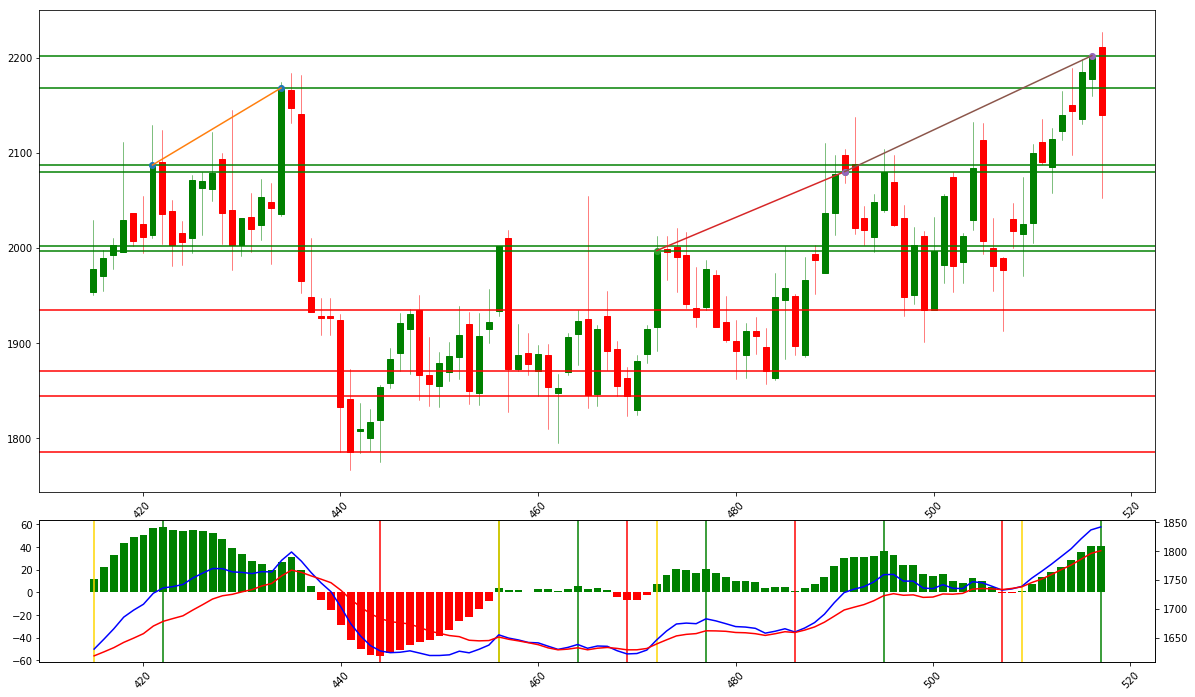

In [8]:
def make_chart(df_in,st_dt = None,en_dt = None):
    if st_dt == None:
        st_dt = df_in["Date"].min()
    if en_dt == None:
        en_dt = df_in["Date"].max()
    fig = plt.figure(figsize=[20,12])
    df_in = df_in.loc[(df_in["Date"].astype("datetime64") >= st_dt) & (df_in["Date"].astype("datetime64") <= en_dt),:]
    #Plot the prices
    ax1 = fig.add_subplot(4,1,(1,3))
    ohlc = df_in[["Index","Open","High","Low","Close"]].copy()
    candlestick_ohlc(ax1,ohlc.values,width=.6, colorup='green', colordown='red')
    ax1.tick_params("x",labelrotation=45)
    #Add the max and min lines
    for x in df_in.loc[df_in["Close_mins"] == True,"Close"]:
        ax1.axhline(x,color="red")
    for x in df_in.loc[df_in["Close_maxs"] == True,"Close"]:
        ax1.axhline(x,color="green")
    #Create progress slopes - max
    s_max = df_in.loc[df_in["Close_maxs"] == True,["Index","Close"]]
    #For each positive progress plot a line
    s_max["line1_cl"] = s_max["Close"]
    s_max["line1_ind"] = s_max["Index"]
    s_max["line2_cl"] = s_max["Close"].shift(1)
    s_max["line2_ind"] = s_max["Index"].shift(1)
    s_max["Shift"] = s_max["Close"] > s_max["Close"].shift(1)
    s_max = s_max.loc[s_max["Shift"],:]
    for i in s_max["Index"]:
        #Generated linear fit
        xi = [int(s_max["line1_ind"][i]),int(s_max["line2_ind"][i])]
        y = [s_max["line1_cl"][i],s_max["line2_cl"][i]]
        slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
        line = slope*np.asarray(xi)+intercept
        ax1.plot(xi,y,'o', xi, line)

    #Create temporary series for MACD above and below 0
    def if_pos(val):
        if val > 0:
            return val
        else:
            return 0
    def if_neg(val):
        if val < 0:
            return val
        else:
            return 0

    #Plot the MACD 
    ax2 = fig.add_subplot(4,1,4)
    ax2.bar(df_in["Index"],[if_pos(x) for x in df_in["MACD"]],color="green")
    ax2.bar(df_in["Index"],[if_neg(x) for x in df_in["MACD"]],color="red")
    ax2.tick_params("x",labelrotation=45)
    #Plot the EMAs
    ax3 = ax2.twinx()
    ax3.plot(df_in["Index"],df_in["EMA12"],color="blue")
    ax3.plot(df_in["Index"],df_in["EMA26"],color="red")
    #Plot the MACD mins
    for x in df_in.loc[df_in["MACD_mins"] == True,"Index"]:
        ax2.axvline(x,color="red")
    #Plot the MACD max
    for x in df_in.loc[df_in["MACD_maxs"] == True,"Index"]:
        ax2.axvline(x,color="green")
    #Plot the MACD pos crossover
    for x in df_in.loc[df_in["MACD_pos"] == True,"Index"]:
        ax2.axvline(x,color="gold")

    plt.show()
# make_chart(df_prices_d,dt.date(dt.date.today().year-2,dt.date.today().month,dt.date.today().day),dt.date.today())
make_chart(df_prices_w,dt.date(dt.date.today().year-2,dt.date.today().month,dt.date.today().day),dt.date.today())

In [9]:

        
#Create progress slopes - max
s_max = df_prices_w.loc[df_prices_w["Close_maxs"] == True,["Index","Close"]]
#For each positive progress plot a line
s_max["line1_cl"] = s_max["Close"]
s_max["line1_ind"] = s_max["Index"]
s_max["line2_cl"] = s_max["Close"].shift(1)
s_max["line2_ind"] = s_max["Index"].shift(1)
s_max["Shift"] = s_max["Close"] > s_max["Close"].shift(1)
s_max = s_max.loc[s_max["Shift"],:]
for i in s_max["Index"]:
    #Generated linear fit
    if()
    xi = [int(s_max["line1_ind"][i]),int(s_max["line2_ind"][i])]
    y = [s_max["line1_cl"][i],s_max["line2_cl"][i]]
    slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
    line = slope*np.asarray(xi)+intercept
s_max

,Index,Close,line1_cl,line1_ind,line2_cl,line2_ind,Shift
26,26.0,1155.0,1155.0,26.0,943.5,5.0,True
86,86.0,1693.0,1693.0,86.0,1155.0,26.0,True
101,101.0,1753.0,1753.0,101.0,1693.0,86.0,True
207,207.0,1353.0,1353.0,207.0,1225.0,162.0,True
226,226.0,1400.0,1400.0,226.0,1353.0,207.0,True
256,256.0,1496.0,1496.0,256.0,1400.0,226.0,True
273,273.0,1571.0,1571.0,273.0,1496.0,256.0,True
313,313.0,1603.0,1603.0,313.0,1571.0,273.0,True
383,383.0,2245.0,2245.0,383.0,1603.0,313.0,True
434,434.0,2168.0,2168.0,434.0,2087.0,421.0,True
